### Hierarchial Clustering

In [6]:
import pandas as pd

In [7]:
crime=pd.read_csv("crime_data.csv")      #loading a dataset

In [8]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime.shape

(50, 5)

In [10]:
crime.info()         #checking data-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime = crime.rename(columns={'Unnamed: 0':'City'})  #renaming column name

In [32]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())              #Normalisation 
    return x

In [33]:
df_norm=norm_func(crime.iloc[:,1:4])

In [34]:
df_norm

,Murder,Assault,UrbanPop
0,0.746988,0.654110,0.440678
1,0.554217,0.746575,0.271186
2,0.439759,0.852740,0.813559
3,0.481928,0.496575,0.305085
4,0.493976,0.791096,1.000000
5,0.427711,0.544521,0.779661
6,0.150602,0.222603,0.762712
7,0.307229,0.660959,0.677966
8,0.879518,0.993151,0.813559
9,1.000000,0.568493,0.474576


In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

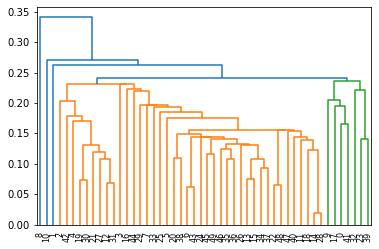

In [16]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method = 'single'))    #creating dendrogram

In [17]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')  #Increased the number of cluster in order to get distinct clusters

In [18]:
model = hc.fit_predict(df_norm)

In [19]:
Cluster=pd.DataFrame(model,columns=['cluster'])

In [20]:
Cluster         #Forming cluster

,cluster
0,0
1,3
2,1
3,1
4,1
5,1
6,1
7,1
8,4
9,0


In [21]:
df_final = pd.concat([crime,Cluster],axis=1)   #joining two dataframes so that we would easily distinguish values of two different clusters.

In [22]:
df_final

,City,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,0


### K-Means Clustering

In [72]:
from sklearn.cluster import KMeans

In [73]:
model =KMeans(n_clusters=2)        #two distinct clusters are formed so we dont need to increase the value of cluster as it will make things for ambiguous

In [74]:
model.fit_predict(df_norm)      

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [75]:
model.labels_              #labels given by k-means algorithm

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [76]:
Clustering = pd.DataFrame(model.labels_,columns=['cluster'])

In [77]:
df_final=pd.concat([crime,Clustering],axis=1)

In [78]:
df_final

,City,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


### DBscan

In [30]:
from sklearn.cluster import DBSCAN

In [64]:
model=DBSCAN(eps=0.3,min_samples=10)

In [65]:
model.fit_predict(df_norm)     #-1 represents noise in data

array([ 1, -1,  1,  0, -1,  0,  0,  0, -1, -1,  0,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [66]:
model.labels_

array([ 1, -1,  1,  0, -1,  0,  0,  0, -1, -1,  0,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [67]:
Clustering = pd.DataFrame(model.labels_,columns=['cluster'])

In [68]:
df_final=pd.concat([crime,Clustering],axis=1)

In [69]:
df_final

,City,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
